In [2]:
import numpy as np # linear algebra
import matplotlib as mpl
import pandas as pd
import seaborn as sns
import re 
from IPython.display import display_html
import itertools
import math
import random
from tqdm import tqdm_notebook as tqdm
from sklearn.metrics import *
import matplotlib.pyplot as plt
import matplotlib

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn import linear_model

# Import Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

#Learning curve
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import f1_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df_train = pd.read_csv("/content/drive/My Drive/Colab Notebooks/data/kalapa/data/train.csv")
df_test = pd.read_csv("/content/drive/My Drive/Colab Notebooks/data/kalapa/data/test.csv")
sample = pd.read_csv("/content/drive/My Drive/Colab Notebooks/data/kalapa/data/simple_submission.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (35,43) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (34,42) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
index = df_test['id']
print(df_train.shape)
print(df_test.shape)

(53030, 195)
(20381, 194)


In [5]:
c_train = df_train.copy()
c_test  = df_test.copy()

c_train['train'] = 1
c_test['train'] = 0
df = pd.concat([c_train, c_test], axis=0, sort=False)

# 1.Drop

In [6]:
def infomation(df):
    x, y = df
    if x != x and y != y:
        return 'nan'
    if x != x:
        return y.lower()
    return x.lower()

df["sex"] = df[['gioiTinh', 'info_social_sex']].apply(infomation, axis=1).astype('object')

In [7]:
drop = ['Field_14', 'Field_16', 'Field_17', 'Field_24', 'Field_26', 'Field_30', 'Field_31', 'Field_37', 'Field_52',
        'Field_57', 'partner0_B', 'partner0_K', 'partner0_L', 'partner1_B', 'partner1_D', 'partner1_E', 'partner1_F',
        'partner1_K', 'partner1_L', 'partner2_B', 'partner2_G', 'partner2_K', 'partner2_L', 'partner3_B', 'partner3_F',
        'partner3_G', 'partner3_H', 'partner3_K', 'partner3_L', 'partner4_A', 'partner4_B', 'partner4_C', 'partner4_D',
        'partner4_E', 'partner4_F', 'partner4_G', 'partner4_H', 'partner4_K', 'partner4_L', 'partner5_B', 'partner5_C',
        'partner5_H', 'partner5_K', 'partner5_L', 'Field_34', 'gioiTinh', 'info_social_sex', 'data.basic_info.locale', 'homeTownCountry',
        'Field_2', 'Field_5', 'Field_49', 'Field_9', 'ngaySinh', 'namSinh', 'Field_10', 'Field_13', 'Field_21', 
        'Field_22', 'Field_38','Field_41', 'Field_42','Field_50', 'Field_53', 'Field_62', 'currentLocationLongitude', 'homeTownLongitude',
        'E_numQuery', 'C_numOrg', 'C_numQuery', 'G_numQuery', 'A_numQuery', 'summary_6m',
        'summary_3m', 'summary_1m', 'summary_1w', 'partner0_C', 'partner0_D', 'partner0_E',
        'partner0_F', 'partner0_H', 'partner1_C', 'partner1_G', 'partner1_H', 'partner2_A',
        'partner2_C', 'partner2_D', 'partner2_E', 'partner2_H', 'partner3_C', 'partner3_E',
        'partner5_D', 'partner5_E', 'partner5_F', 'partner5_G', 'num_of_phone',
        'Field_51', 'Field_73','partner2_F', 'Field_35', 'Field_11', 'Field_15']

df = df.drop(drop, axis=1)

In [8]:
df.shape

(73411, 95)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73411 entries, 0 to 20380
Data columns (total 95 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         73411 non-null  int64  
 1   label                      53030 non-null  float64
 2   Field_1                    34624 non-null  object 
 3   Field_3                    34624 non-null  float64
 4   Field_4                    34624 non-null  object 
 5   Field_6                    34601 non-null  object 
 6   Field_7                    34624 non-null  object 
 7   Field_8                    34624 non-null  object 
 8   Field_12                   9922 non-null   object 
 9   Field_18                   11406 non-null  object 
 10  Field_19                   34624 non-null  float64
 11  Field_20                   34624 non-null  float64
 12  Field_23                   34624 non-null  float64
 13  Field_25                   34541 non-null  obj

In [10]:
df.describe()

,id,label,Field_3,Field_19,Field_20,Field_23,Field_27,Field_28,Field_29,Field_39,Field_58,Field_59,Field_60,Field_63,Field_64,Field_67,Field_69,Field_70,Field_71,Field_72,Field_74,Field_75,Field_76,Field_77,friendCount,subscriberCount,currentLocationLocationId,currentLocationLatitude,homeTownLocationId,homeTownLatitude,topFriends,numOrg,F_numOrg,F_numQuery,E_numOrg,G_numOrg,A_numOrg,partner0_A,partner0_G,partner1_A,partner3_A,partner3_D,partner5_A,Field_78,Field_79,Field_80,Field_81,Field_82,train
count,73411.000000,53030.000000,34624.000000,34624.000000,3.462400e+04,34624.000000,3.462400e+04,34624.000000,34624.000000,34624.000000,34624.000000,34624.000000,34623.000000,34624.000000,32730.000000,3.462400e+04,33601.000000,34624.000000,34624.000000,34624.000000,28418.000000,32356.000000,32356.000000,32356.000000,33182.000000,33182.000000,3.318200e+04,33182.000000,3.318200e+04,33182.000000,28570.000000,66009.000000,33809.000000,33809.000000,35129.000000,34097.000000,56047.000000,66016.000000,66016.000000,66016.000000,66016.000000,66016.000000,66016.000000,49986.000000,38533.000000,49880.000000,49450.000000,73411.000000,73411.000000
mean,36705.000000,0.316726,1.535958,0.276163,3.619303e+06,31.796962,2.150961e+05,9553.550312,6.565070,0.813395,1.161478,14.943161,13.360483,3.048492,2.118485,5.266323e+05,0.306720,0.419219,0.343666,0.151108,1888.550602,4.288324,0.877519,3.527290,522.967784,182.912031,6.512725e+13,9.245179,5.886709e+13,8.646821,3.775639,3.384205,1.266379,1.512911,1.334054,1.195120,3.319089,0.476400,0.438273,0.506604,0.330844,0.205208,0.248712,20.527708,34.626439,-4.837180,-39.896724,1.696503,0.722371
std,21192.074643,0.465204,0.498713,0.857717,2.315419e+06,46.682919,8.227507e+05,37063.266181,6.397963,0.389599,2.001733,17.000747,18.112186,2.219659,1.536807,2.915771e+05,0.321215,0.281012,0.269078,0.408052,1295.421829,2.339499,1.072342,2.170003,1028.352589,1915.393127,6.320532e+13,9.131525,6.045908e+13,9.111339,1.582260,2.580779,0.554288,0.932161,0.623244,0.450144,2.017354,0.499446,0.496179,0.499960,0.470521,0.403856,0.432270,44.357281,40.154112,36.441134,70.960473,1.096378,0.447832
min,0.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,-0.500000,-0.990000,-31.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,-37.815600,0.000000e+00,-33.925500,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-303.000000,0.000000,-303.000000,-332.000000,1.000000,0.000000
25%,18352.500000,0.000000,1.000000,0.000000,1.490000e+06,1.000000,0.000000e+00,0.000000,0.000000,1.000000,0.000000,4.000000,2.000000,2.000000,1.000000,2.679622e+05,0.000000,0.120000,0.165000,-0.080000,717.000000,3.000000,0.000000,2.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,5.656854,-8.339286,-89.000000,1.000000,0.000000
50%,36705.000000,0.000000,2.000000,0.000000,3.828230e+06,14.000000,0.000000e+00,0.000000,6.000000,1.000000,0.000000,5.000000,3.000000,2.000000,2.000000,5.035605e+05,0.200000,0.410000,0.300000,0.150000,1801.000000,4.000000,1.000000,3.000000,40.000000,0.000000,1.063012e+14,10.770000,1.039350e+14,9.938000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,16.000000,17.039171,1.550000,0.000000,1.000000,1.000000
75%,55057.500000,1.000000,2.000000,0.000000,4.500000e+06,40.000000,0.000000e+00,0.000000,12.000000,1.000000,2.000000,33.000000,31.000000,4.000000,3.000000,7.559130e+05,0.560000,0.620000,0.535000,0.390000,2908.000000,5.000000,1.000000,5.000000,532.000000,0.000000,1.084590e+14,19.745825,1.087476e+14,18.676100,5.000000,5.000000,1.000000,2.000000,2.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,36.000000,52.3067

In [11]:
object_columns = df.select_dtypes(include='object')
numeric_columns = df.select_dtypes(exclude='object')
print(object_columns.shape)
print(numeric_columns.shape)

(73411, 46)
(73411, 49)


In [12]:
numeric_columns.describe()

,id,label,Field_3,Field_19,Field_20,Field_23,Field_27,Field_28,Field_29,Field_39,Field_58,Field_59,Field_60,Field_63,Field_64,Field_67,Field_69,Field_70,Field_71,Field_72,Field_74,Field_75,Field_76,Field_77,friendCount,subscriberCount,currentLocationLocationId,currentLocationLatitude,homeTownLocationId,homeTownLatitude,topFriends,numOrg,F_numOrg,F_numQuery,E_numOrg,G_numOrg,A_numOrg,partner0_A,partner0_G,partner1_A,partner3_A,partner3_D,partner5_A,Field_78,Field_79,Field_80,Field_81,Field_82,train
count,73411.000000,53030.000000,34624.000000,34624.000000,3.462400e+04,34624.000000,3.462400e+04,34624.000000,34624.000000,34624.000000,34624.000000,34624.000000,34623.000000,34624.000000,32730.000000,3.462400e+04,33601.000000,34624.000000,34624.000000,34624.000000,28418.000000,32356.000000,32356.000000,32356.000000,33182.000000,33182.000000,3.318200e+04,33182.000000,3.318200e+04,33182.000000,28570.000000,66009.000000,33809.000000,33809.000000,35129.000000,34097.000000,56047.000000,66016.000000,66016.000000,66016.000000,66016.000000,66016.000000,66016.000000,49986.000000,38533.000000,49880.000000,49450.000000,73411.000000,73411.000000
mean,36705.000000,0.316726,1.535958,0.276163,3.619303e+06,31.796962,2.150961e+05,9553.550312,6.565070,0.813395,1.161478,14.943161,13.360483,3.048492,2.118485,5.266323e+05,0.306720,0.419219,0.343666,0.151108,1888.550602,4.288324,0.877519,3.527290,522.967784,182.912031,6.512725e+13,9.245179,5.886709e+13,8.646821,3.775639,3.384205,1.266379,1.512911,1.334054,1.195120,3.319089,0.476400,0.438273,0.506604,0.330844,0.205208,0.248712,20.527708,34.626439,-4.837180,-39.896724,1.696503,0.722371
std,21192.074643,0.465204,0.498713,0.857717,2.315419e+06,46.682919,8.227507e+05,37063.266181,6.397963,0.389599,2.001733,17.000747,18.112186,2.219659,1.536807,2.915771e+05,0.321215,0.281012,0.269078,0.408052,1295.421829,2.339499,1.072342,2.170003,1028.352589,1915.393127,6.320532e+13,9.131525,6.045908e+13,9.111339,1.582260,2.580779,0.554288,0.932161,0.623244,0.450144,2.017354,0.499446,0.496179,0.499960,0.470521,0.403856,0.432270,44.357281,40.154112,36.441134,70.960473,1.096378,0.447832
min,0.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,-0.500000,-0.990000,-31.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,-37.815600,0.000000e+00,-33.925500,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-303.000000,0.000000,-303.000000,-332.000000,1.000000,0.000000
25%,18352.500000,0.000000,1.000000,0.000000,1.490000e+06,1.000000,0.000000e+00,0.000000,0.000000,1.000000,0.000000,4.000000,2.000000,2.000000,1.000000,2.679622e+05,0.000000,0.120000,0.165000,-0.080000,717.000000,3.000000,0.000000,2.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,5.656854,-8.339286,-89.000000,1.000000,0.000000
50%,36705.000000,0.000000,2.000000,0.000000,3.828230e+06,14.000000,0.000000e+00,0.000000,6.000000,1.000000,0.000000,5.000000,3.000000,2.000000,2.000000,5.035605e+05,0.200000,0.410000,0.300000,0.150000,1801.000000,4.000000,1.000000,3.000000,40.000000,0.000000,1.063012e+14,10.770000,1.039350e+14,9.938000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,16.000000,17.039171,1.550000,0.000000,1.000000,1.000000
75%,55057.500000,1.000000,2.000000,0.000000,4.500000e+06,40.000000,0.000000e+00,0.000000,12.000000,1.000000,2.000000,33.000000,31.000000,4.000000,3.000000,7.559130e+05,0.560000,0.620000,0.535000,0.390000,2908.000000,5.000000,1.000000,5.000000,532.000000,0.000000,1.084590e+14,19.745825,1.087476e+14,18.676100,5.000000,5.000000,1.000000,2.000000,2.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,36.000000,52.3067

In [13]:
object_columns.describe()

,Field_1,Field_4,Field_6,Field_7,Field_8,Field_12,Field_18,Field_25,Field_32,Field_33,diaChi,Field_36,Field_40,Field_43,Field_44,Field_45,Field_46,Field_47,Field_48,Field_54,Field_55,Field_56,Field_61,Field_65,Field_66,Field_68,maCv,currentLocationCity,currentLocationCountry,currentLocationName,currentLocationState,homeTownCity,homeTownName,homeTownState,F_startDate,F_endDate,E_startDate,E_endDate,C_startDate,C_endDate,G_startDate,G_endDate,A_startDate,A_endDate,brief,sex
count,34624,34624,34601,34624,34624,9922,11406,34541,33829,31573,34624,34624,28053,34624,34624,34624,34624,34624,31963,19605,34572,34624,34624,32731,33601,27155,12382,18997,18997,18997,18996,17382,17382,17382,33809,33809,35129,35129,29712,29712,34097,34097,56047,56047,70335,73411
unique,28806,2,3060,2021,2297,7,8727,2706,2556,2867,27701,34,975,4319,12249,13359,17902,5,15760,49,235,1515,36,10,8,14690,4546,1020,51,1275,235,1013,1305,170,501,483,497,480,419,409,502,486,823,705,20,3
top,2017-03-24T20:10:37.62Z,T1,2018-12-27,2019-01-01,2019-12-31,G8,.,2018-12-27,2018-12-28,2015-01-01,TT Dịch vụ Việc Làm Tp.HCM,DN,2019-01-01,2017-03-24T14:37:56.11Z,2019-06-26T10:24:56Z,BO0001Z,Trung Tâm Dịch Vụ Việc Làm Thành Phố Hồ Chí Minh,Zezo,153 Xô Viết Nghệ Tĩnh Quận Bình Thạnh,VN,YN,Doanh nghiệp có vốn đầu tư nước ngoài,Khối DN Ngoài quốc doanh,Vùng 1,D,0301340024,Công nhân,Ho Chi Minh City,Vietnam,Thành phố Hồ Chí Minh,Ho Chi Minh City,Hanoi,Hà Nội,Hanoi,2019-08-18,2019-08-18,2019-08-19,2019-08-19,2019-10-01,2019-12-12,2019-10-01,2019-10-01,2019-09-04,2019-11-26,0,male
freq,343,18708,1198,8814,10547,9536,419,1112,1100,1749,377,20577,9200,1969,968,1046,498,13841,498,18408,8175,8175,11070,15973,7150,377,1025,3712,18577,3178,3901,1718,1459,2102,1468,671,1277,460,278,244,268,257,342,362,17764,28587


# 2.Deeling with category feature

In [14]:
object_columns.shape

(73411, 46)

In [15]:
object_columns = object_columns.drop(columns=['Field_1', 'Field_6', 'Field_7', 'Field_8', 'Field_25', 
                                              'Field_33', 'Field_40', 'Field_43', 'Field_44', 'Field_18',
                                              'F_startDate', 'F_endDate', 'E_startDate', 'E_endDate', 'C_startDate', 'C_endDate', 'G_startDate',
                                              'G_endDate', 'A_startDate', 'A_endDate','Field_4', 'Field_12', 'Field_45', 'Field_36', 'Field_54', 'Field_55', 'Field_66', 
                                              'Field_68', 'currentLocationState', 'homeTownCity', 'homeTownName', 'homeTownState', 'Field_32'], axis=1)

In [16]:
#object_columns.to_csv('/content/drive/My Drive/Colab Notebooks/data/kalapa/data/object.xlsx')

In [17]:
print(object_columns.shape)

(73411, 13)


In [18]:
object_columns.isnull().sum()

diaChi                    38787
Field_46                  38787
Field_47                  38787
Field_48                  41448
Field_56                  38787
Field_61                  38787
Field_65                  40680
maCv                      61029
currentLocationCity       54414
currentLocationCountry    54414
currentLocationName       54414
brief                      3076
sex                           0
dtype: int64

In [19]:
# Hàm tính tổng các giá trị còn thiếu
def missing_values(df):
    mis_val = df.isnull().sum() #tổng các giá trị còn thiếu
    mis_val_per = 100 * df.isnull().sum()/len(df) #Phần trăm các giá trị còn thiếu
    mis_val_table = pd.concat([mis_val, mis_val_per], axis=1) #Tạo thành bảng để thể hiện 2 giá trị trên
    mis_val_table_rename = mis_val_table.rename(
    columns = {0: "Missing", 1 : "Percent %"})
    #Sắp xếp bảng theo tỉ lệ phần trăm giảm dần
    mis_val_table_rename = mis_val_table_rename[mis_val_table_rename.iloc[:, 1] != 0].sort_values("Percent %", ascending=False).round(1)
    print("Có tất cả " + str(df.shape[1]) + " cột.\n"
          "Trog đó có " + str(mis_val_table_rename.shape[0]) + " cột bị thiếu data")
    return mis_val_table_rename

In [20]:
category = missing_values(object_columns)
category

Có tất cả 13 cột.
Trog đó có 12 cột bị thiếu data


,Missing,Percent %
maCv,61029,83.1
currentLocationCity,54414,74.1
currentLocationCountry,54414,74.1
currentLocationName,54414,74.1
Field_48,41448,56.5
Field_65,40680,55.4
diaChi,38787,52.8
Field_46,38787,52.8
Field_47,38787,52.8
Field_56,38787,52.8


In [21]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

In [22]:
#from sklearn.feature_extraction import DictVectorizer
#vec = DictVectorizer(sparse=False, dtype=int)
#vec.fit_transform(object_columns)

In [23]:
#from sklearn.impute import SimpleImputer
#imp = SimpleImputer(strategy='constant')
#imp.fit_transform(object_columns)

In [24]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from numpy import array

values = array(object_columns)

In [25]:
! pip install --upgrade category_encoders

     |████████████████████████████████| 81kB 2.0MB/s 


In [26]:
import category_encoders as ce
object_columns = ce.().fit_transform(object_columns)

In [27]:
obj = missing_values(object_columns)
obj

Có tất cả 13 cột.
Trog đó có 0 cột bị thiếu data


,Missing,Percent %


# 3. Deeling with Numeric

In [28]:
import missingno as mno

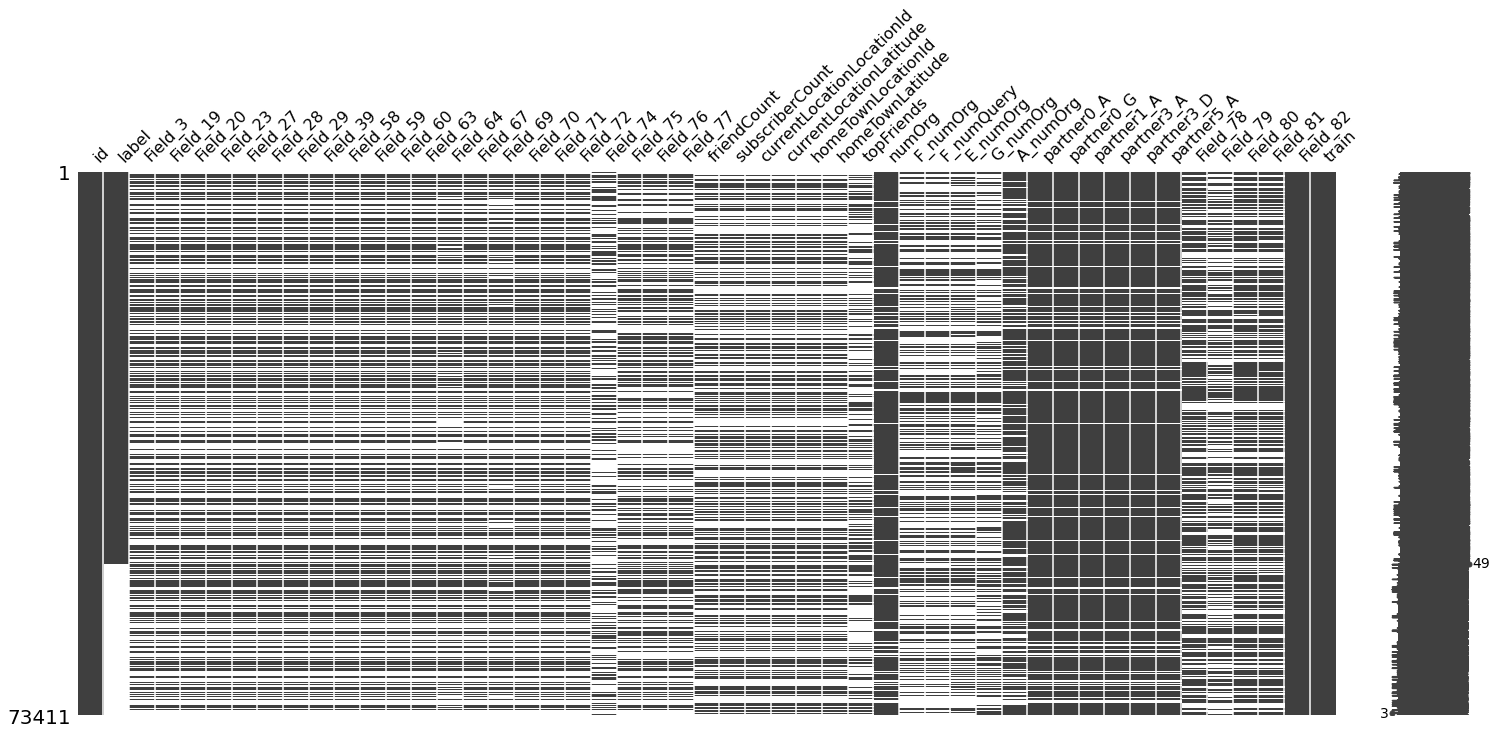

In [29]:
mno.matrix(numeric_columns, figsize=(25,10))

In [30]:
#numeric_columns.to_csv('/content/drive/My Drive/Colab Notebooks/data/kalapa/data/numeric.xlsx')

In [31]:
numeric_columns.isnull().sum()

id                               0
label                        20381
Field_3                      38787
Field_19                     38787
Field_20                     38787
Field_23                     38787
Field_27                     38787
Field_28                     38787
Field_29                     38787
Field_39                     38787
Field_58                     38787
Field_59                     38787
Field_60                     38788
Field_63                     38787
Field_64                     40681
Field_67                     38787
Field_69                     39810
Field_70                     38787
Field_71                     38787
Field_72                     38787
Field_74                     44993
Field_75                     41055
Field_76                     41055
Field_77                     41055
friendCount                  40229
subscriberCount              40229
currentLocationLocationId    40229
currentLocationLatitude      40229
homeTownLocationId  

In [32]:
numeric_columns_cols = numeric_columns.drop(columns=['id', 'label', 'Field_82'],axis=1)

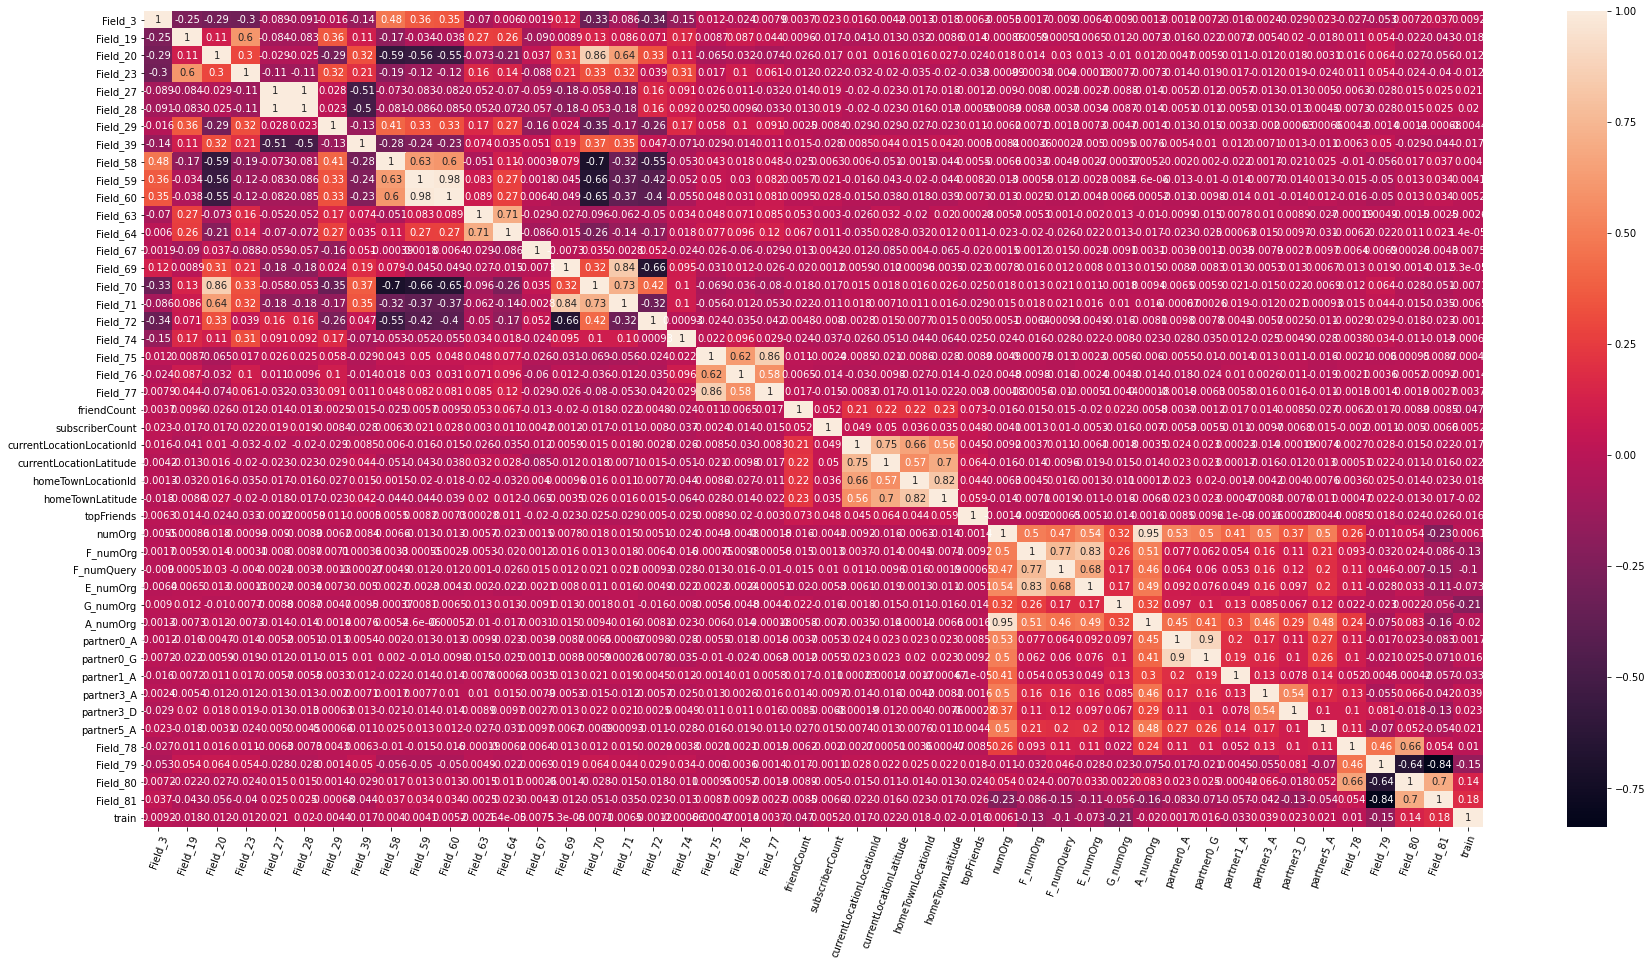

In [33]:
corr = numeric_columns_cols.corr()
fig, ax = plt.subplots(figsize=(30,15))
sns.heatmap(corr, annot=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=70);
plt.show()

In [34]:
numeric_columns_cols = numeric_columns_cols.drop(columns=['Field_3', 'Field_29', 'Field_39', 'Field_67',
                                                          'Field_72', 'Field_74', 'Field_79','Field_81',
                                                          'subscriberCount', 'topFriends', 'partner1_A',
                                                          'G_numOrg'], axis=1)

In [35]:
numeric_columns_cols.shape

(73411, 34)

In [36]:
numeric = missing_values(numeric_columns_cols)
numeric

Có tất cả 34 cột.
Trog đó có 33 cột bị thiếu data


,Missing,Percent %
Field_76,41055,55.9
Field_77,41055,55.9
Field_75,41055,55.9
Field_64,40681,55.4
friendCount,40229,54.8
homeTownLatitude,40229,54.8
homeTownLocationId,40229,54.8
currentLocationLatitude,40229,54.8
currentLocationLocationId,40229,54.8
Field_69,39810,54.2


In [37]:
df_final = pd.concat([object_columns, numeric_columns], axis=1, sort=False)

In [38]:
my_imputer = SimpleImputer()
imputed_df_final = my_imputer.fit_transform(df_final)

In [39]:
df_train = df_final[df_final['train'] == 1]
df_train = df_train.drop(['train',],axis=1)


df_test = df_final[df_final['train'] == 0]
df_test = df_test.drop(['label'],axis=1)
df_test = df_test.drop(['train',],axis=1)

In [40]:
X_train = df_train.drop(['label'], axis=1)
X_test = df_test
y_train = df_train['label']

In [41]:
len(X_test)

20381

In [43]:
classes = ["Good", "Bad"]
cv = ShuffleSplit(n_splits = 100, test_size = 0.25, random_state = 0)
train_size = np.linspace(.1, 1.0, 15)

In [44]:
from xgboost import XGBRegressor

model = XGBRegressor()
#model, Summary_LR = PrintResults(model, X_train, y_train, 'XGBRegressor')

#y_train_LR = pd.Series(model.predict(X_train), name = "XGBR")
#y_test_LR = pd.Series(model.predict(X_test), name = "XGBR")

[00:58:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:58:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:58:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:59:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:59:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:59:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:59:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:59:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

ValueError: ignored

In [45]:
model.fit(X_train, y_train)

[01:09:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [46]:
prediction = model.predict(X_test)

In [47]:
len(prediction)

20381

In [57]:
data = pd.DataFrame(data=prediction, columns=['label'])

In [58]:
data.head()

,label
0,0.237611
1,0.324900
2,0.404308
3,0.164013
4,0.158115


In [61]:
data

,label
0,0.237611
1,0.324900
2,0.404308
3,0.164013
4,0.158115
...,...
20376,0.166473
20377,0.162990
20378,0.063635
20379,0.248075


In [59]:
submiss = pd.DataFrame({
    'id': index,
    'label': data['label']
})
submiss.to_csv('/content/drive/My Drive/Colab Notebooks/data/kalapa/data/submit.csv')